<a href="https://colab.research.google.com/github/sisli7/youtube-search-/blob/master/lstmprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd 
import numpy as np 
from google.colab import files 
import io 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math 
from sklearn.metrics import mean_squared_error
from numpy import array




In [3]:
uploaded=files.upload()
df=pd.read_csv(io.BytesIO(uploaded['eurusd.csv']))
df 

Saving eurusd.csv to eurusd.csv


,Local time,Open,High,Low,Close,Volume
0,01.01.2020 00:00:00.000 GMT+0330,1.12158,1.12160,1.12157,1.12160,25.13
1,01.01.2020 00:01:00.000 GMT+0330,1.12160,1.12163,1.12160,1.12163,3.03
2,01.01.2020 00:02:00.000 GMT+0330,1.12161,1.12170,1.12160,1.12169,21.30
3,01.01.2020 00:03:00.000 GMT+0330,1.12170,1.12173,1.12169,1.12173,11.02
4,01.01.2020 00:04:00.000 GMT+0330,1.12171,1.12171,1.12170,1.12170,14.81
...,...,...,...,...,...,...
262015,30.06.2020 23:55:00.000 GMT+0430,1.12278,1.12286,1.12277,1.12286,37.09
262016,30.06.2020 23:56:00.000 GMT+0430,1.12285,1.12285,1.12271,1.12272,167.27
262017,30.06.2020 23:57:00.000 GMT+0430,1.12273,1.12286,1.12271,1.12282,85.87
262018,30.06.2020 23:58:00.000 GMT+0430,1.12285,1.12290,1.12281,1.12288,118.47


In [5]:
close_column=df['Close']
date_column=df['Local time']
print(close_column)

0         1.12160
1         1.12163
2         1.12169
3         1.12173
4         1.12170
           ...   
262015    1.12286
262016    1.12272
262017    1.12282
262018    1.12288
262019    1.12301
Name: Close, Length: 262020, dtype: float64


In [8]:
df1=df.reset_index()['Close']

In [9]:
df1[1228:]

1228      1.12076
1229      1.12076
1230      1.12076
1231      1.12076
1232      1.12076
           ...   
262015    1.12286
262016    1.12272
262017    1.12282
262018    1.12288
262019    1.12301
Name: Close, Length: 260792, dtype: float64

In [10]:
df1.shape

(262020,)

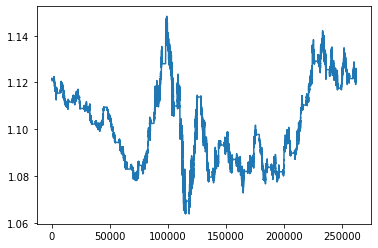

In [12]:
plt.plot(df1)

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.68378091]
 [0.68413581]
 [0.68484562]
 ...
 [0.69821365]
 [0.69892346]
 [0.70046137]]


In [15]:
df1.shape

(262020, 1)

In [19]:
train_data

array([[0.68378091],
       [0.68413581],
       [0.68484562],
       ...,
       [0.22347096],
       [0.22311605],
       [0.22299775]])

In [30]:
#spliting dataset into train and test split 
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [31]:
training_size,test_size

(170313, 91707)

In [50]:
def create_dataset(dataset, time_step=1):
  dataX, dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [51]:
time_step=100 
x_train, y_train = create_dataset(train_data, time_step)
x_test, ytest=create_dataset(test_data, time_step)

In [52]:
print(x_train)

[[0.68378091 0.68413581 0.68484562 ... 0.67384361 0.67384361 0.67384361]
 [0.68413581 0.68484562 0.68531882 ... 0.67384361 0.67384361 0.67384361]
 [0.68484562 0.68531882 0.68496392 ... 0.67384361 0.67384361 0.67384361]
 ...
 [0.2279664  0.22997752 0.23068733 ... 0.22382586 0.22347096 0.22394416]
 [0.22997752 0.23068733 0.23127884 ... 0.22347096 0.22394416 0.22406246]
 [0.23068733 0.23127884 0.23175204 ... 0.22394416 0.22406246 0.22347096]]


In [53]:
print(x_test.shape),print(ytest.shape)

(91606, 100)
(91606,)


(None, None)

In [56]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(x_train,y_train,validation_data=(x_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
2660/2660 [==============================] - 527s 198ms/step - loss: 5.4416e-06 - val_loss: 1.0517e-05
Epoch 2/10
2660/2660 [==============================] - 526s 198ms/step - loss: 5.3553e-06 - val_loss: 8.1702e-06
Epoch 3/10
2660/2660 [==============================] - 529s 199ms/step - loss: 5.1662e-06 - val_loss: 5.0389e-06
Epoch 4/10
2660/2660 [==============================] - 532s 200ms/step - loss: 5.1459e-06 - val_loss: 4.1896e-06
Epoch 5/10
2660/2660 [==============================] - 537s 202ms/step - loss: 5.1603e-06 - val_loss: 3.3900e-06
Epoch 6/10
2660/2660 [==============================] - 527s 198ms/step - loss: 4.8951e-06 - val_loss: 3.6999e-06
Epoch 7/10
2660/2660 [==============================] - 529s 199ms/step - loss: 5.1161e-06 - val_loss: 2.7028e-06
Epoch 8/10
2660/2660 [==============================] - 526s 198ms/step - loss: 4.8738e-06 - val_loss: 5.6031e-06
Epoch 9/10
2660/2660 [==============================] - 520s 196ms/step - loss: 4.8668e-

In [74]:
#do the predictions
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [75]:
#transformback to orginal form 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [79]:
#test data rmse
math.sqrt(mean_squared_error(y_train,train_predict))

0.7008455435640637

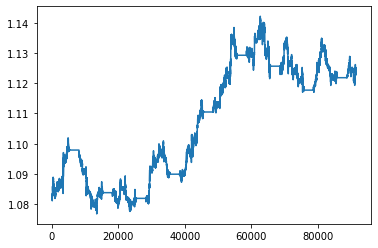

In [80]:
plt.plot(test_predict)

In [81]:
len(test_data)

91707

In [84]:
x_input=test_data[81707:].reshape(1,-1)
x_input.shape

(1, 10000)

In [87]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7917898970779618,
 0.7913166922985937,
 0.7910800899089097,
 0.7907251863243818,
 0.7907251863243818,
 0.7916715958831215,
 0.7922631018573316,
 0.7922631018573316,
 0.793209511416066,
 0.791908198272802,
 0.7929729090263837,
 0.793564415000592,
 0.7936827161954341,
 0.7936827161954341,
 0.794865728143856,
 0.7951023305335401,
 0.794984029338698,
 0.7951023305335401,
 0.7952206317283839,
 0.7952206317283839,
 0.7956938365077502,
 0.7958121377025922,
 0.7958121377025922,
 0.7958121377025922,
 0.7958121377025922,
 0.7958121377025922,
 0.7956938365077502,
 0.7955755353129099,
 0.7955755353129099,
 0.7958121377025922,
 0.7958121377025922,
 0.7956938365077502,
 0.7956938365077502,
 0.7956938365077502,
 0.796285342481962,
 0.796403643676804,
 0.796403643676804,
 0.796285342481962,
 0.7954572341180661,
 0.7954572341180661,
 0.793209511416066,
 0.7930912102212258,
 0.7930912102212258,
 0.7930912102212258,
 0.7930912102212258,
 0.7930912102212258,
 0.7920264994676458,
 0.793564415000592,
 0.

In [83]:
# from numpy import array 
# lst_output=[]
# n_steps=100
# i=0
# while(i<30):
#   if(len(temp_input)>100):




-27513

In [89]:
test_predict[0]

array([1.0819781], dtype=float32)

In [90]:
test_predict[-1]

array([1.1229397], dtype=float32)

In [93]:
test_predict[-2]

array([1.1228585], dtype=float32)

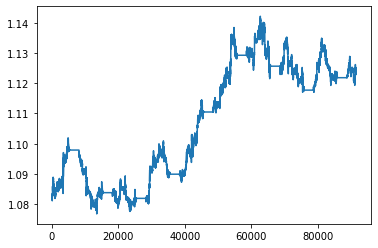

In [98]:
last=test_predict[:-10]
plt.plot(last)

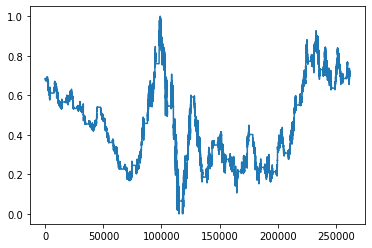

In [99]:
real_last=df1[:-10]
plt.plot(real_last)

In [101]:
x= test_predict[-10:]
pd.DataFrame(x).to_csv("predict.csv")
files.download('predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
y=df['Close']
real=y[-10:]
print(real)
pd.DataFrame(real).to_csv("real(-10).csv")
files.download('real(-10).csv')

262010    1.12268
262011    1.12272
262012    1.12276
262013    1.12279
262014    1.12277
262015    1.12286
262016    1.12272
262017    1.12282
262018    1.12288
262019    1.12301
Name: Close, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>